# Load Labs and Dataset

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
# Load datasets (adjust file paths if necessary)
transactional_data = pd.read_csv('transactional_data.csv')
customer_profile = pd.read_csv('customer_profile.csv')
customer_address = pd.read_csv('customer_address_and_zip_mapping.csv')
delivery_cost_data = pd.read_excel('delivery_cost_data.xlsx')

# 1. Customer Address and Zip Mapping

### Basic Information

In [8]:
# Display basic information about the dataset
print("Dataset Information:")
customer_address.info()

# Display the first 5 rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
print(customer_address.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   zip           1801 non-null   int64 
 1   full address  1801 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.3+ KB

First 5 rows of the dataset:
     zip                                       full address
0  71018  71018,Cotton Valley,Louisiana,LA,Webster,119,3...
1  71021  71021,Cullen,Louisiana,LA,Webster,119,32.9721,...
2  71023  71023,Doyline,Louisiana,LA,Webster,119,32.49,-...
3  71024  71024,Dubberly,Louisiana,LA,Webster,119,32.519...
4  71039  71039,Heflin,Louisiana,LA,Webster,119,32.447,-...


In [10]:
# Check for duplicates
duplicates = customer_address.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Count unique ZIP codes
unique_zip_count = customer_address['zip'].nunique()
print(f"Number of unique ZIP codes: {unique_zip_count}")

# Preview some full addresses for format validation
print("\nSample full addresses:")
print(customer_address['full address'].sample(5))

Number of duplicate rows: 0
Number of unique ZIP codes: 1801

Sample full addresses:
1626    41619,Drift,Kentucky,KY,Floyd,71,37.4933,-82.7575
1697    41174,South Portsmouth,Kentucky,KY,Greenup,89,...
1130    67739,Herndon,Kansas,KS,Rawlins,153,39.9036,-1...
657     01522,Jefferson,Massachusetts,MA,Worcester,27,...
1617    41602,Auxier,Kentucky,KY,Floyd,71,37.737,-82.7582
Name: full address, dtype: object


### Visualize Geographical Distribution of ZIP Codes

state
MA    684
KY    421
KS    371
MD    293
LA     32
Name: zip, dtype: int64


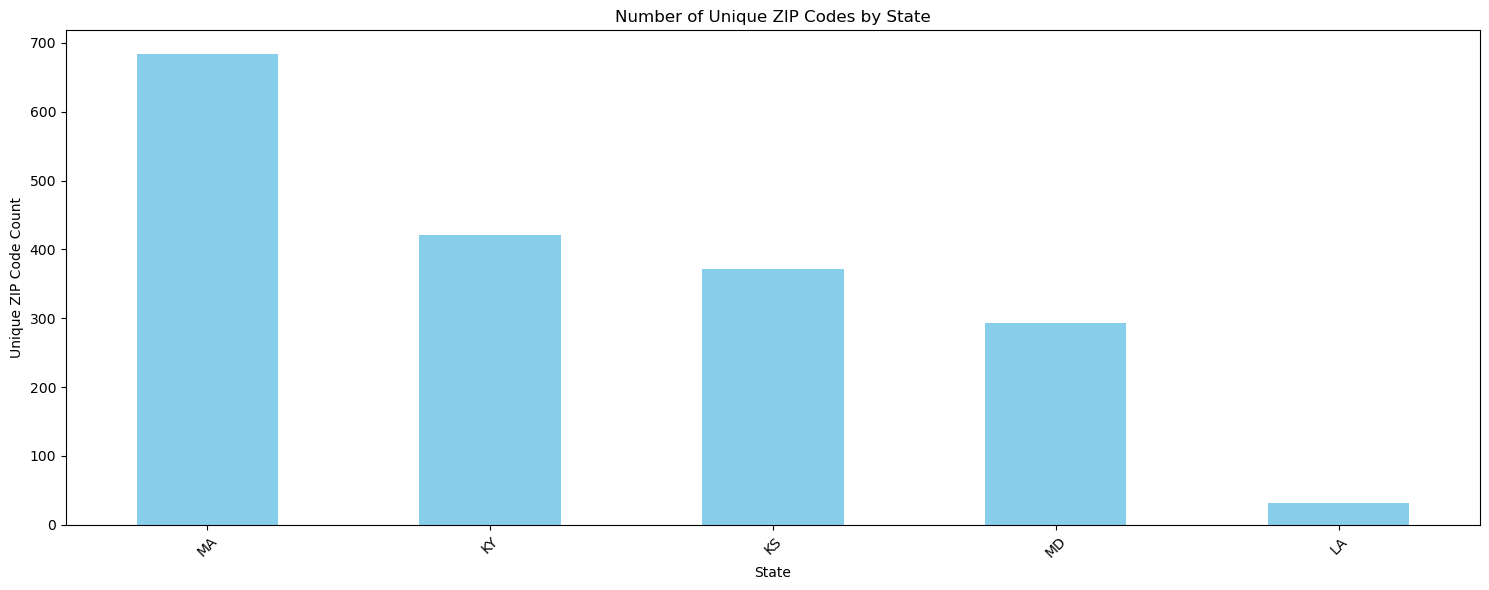

In [12]:
# Extract state from the full_address column (assuming state info is after the second comma)
# Adjust the split if the address structure is different
customer_address['state'] = customer_address['full address'].apply(lambda x: x.split(',')[3].strip() if len(x.split(',')) > 3 else None)

# Count the number of unique ZIP codes per state
zip_count_by_state = customer_address.groupby('state')['zip'].nunique().sort_values(ascending=False)

# Display the count for quick review
print(zip_count_by_state)

# Step 2: Visualize using a bar chart
plt.figure(figsize=(15, 6))
zip_count_by_state.plot(kind='bar', color='skyblue')
plt.title('Number of Unique ZIP Codes by State')
plt.xlabel('State')
plt.ylabel('Unique ZIP Code Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Customer Profile

### Basic Information

In [5]:
# Display basic information about the dataset
print("Dataset Information:")
customer_profile.info()

# Display the first 5 rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
print(customer_profile.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUSTOMER_NUMBER       30478 non-null  int64  
 1   PRIMARY_GROUP_NUMBER  12282 non-null  float64
 2   FREQUENT_ORDER_TYPE   30478 non-null  object 
 3   FIRST_DELIVERY_DATE   30478 non-null  object 
 4   ON_BOARDING_DATE      30478 non-null  object 
 5   COLD_DRINK_CHANNEL    30478 non-null  object 
 6   TRADE_CHANNEL         30478 non-null  object 
 7   SUB_TRADE_CHANNEL     30478 non-null  object 
 8   LOCAL_MARKET_PARTNER  30478 non-null  bool   
 9   CO2_CUSTOMER          30478 non-null  bool   
 10  ZIP_CODE              30478 non-null  int64  
dtypes: bool(2), float64(1), int64(2), object(6)
memory usage: 2.2+ MB

First 5 rows of the dataset:
   CUSTOMER_NUMBER  PRIMARY_GROUP_NUMBER FREQUENT_ORDER_TYPE  \
0        501556470                 376.0  

### Data Quality Checks

In [7]:
# Check for missing values, especially in columns relevant to business goals
missing_values = customer_profile.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = customer_profile.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Summary statistics for numerical features
numerical_summary = customer_profile.describe()
print("\nSummary statistics for numerical features:\n", numerical_summary)

# Check for unique values in key categorical variables
categorical_columns = ['FREQUENT_ORDER_TYPE', 'COLD_DRINK_CHANNEL', 'TRADE_CHANNEL', 'SUB_TRADE_CHANNEL']
for col in categorical_columns:
    unique_values = customer_profile[col].unique()
    print(f"\nUnique values in '{col}':\n{unique_values}")

Missing Values:
 CUSTOMER_NUMBER             0
PRIMARY_GROUP_NUMBER    18196
FREQUENT_ORDER_TYPE         0
FIRST_DELIVERY_DATE         0
ON_BOARDING_DATE            0
COLD_DRINK_CHANNEL          0
TRADE_CHANNEL               0
SUB_TRADE_CHANNEL           0
LOCAL_MARKET_PARTNER        0
CO2_CUSTOMER                0
ZIP_CODE                    0
dtype: int64

Number of duplicate rows: 0

Summary statistics for numerical features:
        CUSTOMER_NUMBER  PRIMARY_GROUP_NUMBER      ZIP_CODE
count     3.047800e+04          12282.000000  30478.000000
mean      5.383018e+08           2779.847826  30252.250345
std       4.795064e+07           2608.636960  25953.082206
min       5.002457e+08              4.000000   1001.000000
25%       5.011643e+08            444.000000   2155.000000
50%       5.015740e+08           1892.000000  21771.000000
75%       6.000758e+08           4488.000000  42762.000000
max       6.009754e+08           9999.000000  71483.000000

Unique values in 'FREQUENT_ORDER_T

✅ Key Findings from Data Quality Check
1. Missing Values:
   1. "PRIMARY_GROUP_NUMBER" has 18,196 missing values out of 30,478 entries (~60% missing).
   2. Other columns are complete with no missing values.

3. No Duplicates were found in the dataset.

4. Numerical Features Summary:
   1. "PRIMARY_GROUP_NUMBER" ranges from 4 to 9999 for non-missing entries.
   2. It likely represents customer groups or sales performance categories. The missing values might correspond to inactive customers or customers yet to  be grouped.

### Missing Value Analysis

Distribution of missing PRIMARY_GROUP_NUMBER by Local Market Partner and CO2 Customer:
   LOCAL_MARKET_PARTNER  CO2_CUSTOMER  count
0                 False         False    199
1                 False          True    400
2                  True         False   8541
3                  True          True   9056


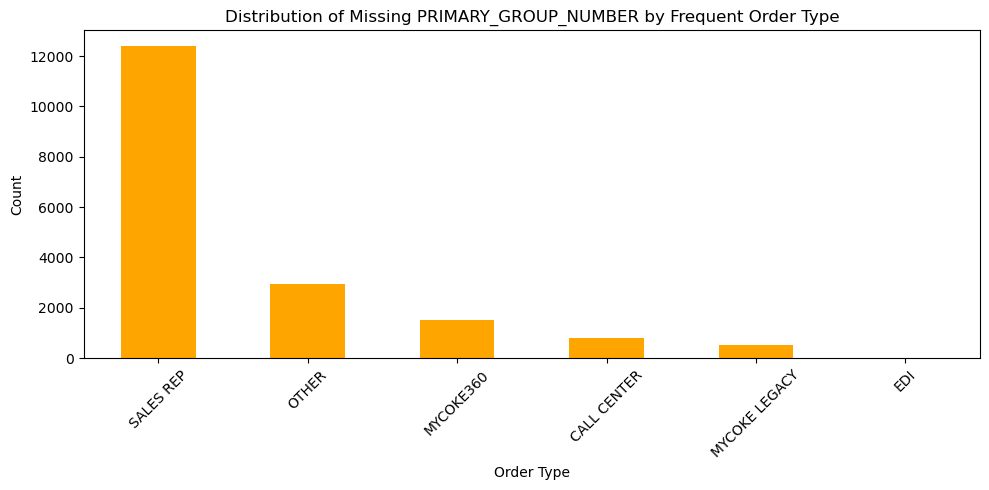

In [9]:
# Check if missing PRIMARY_GROUP_NUMBER relates to Local Market Partner status or CO2 purchasing
missing_group_analysis = customer_profile[customer_profile['PRIMARY_GROUP_NUMBER'].isnull()]

# Analyze proportion of missing values for LOCAL_MARKET_PARTNER and CO2_CUSTOMER
missing_partner_co2 = missing_group_analysis.groupby(['LOCAL_MARKET_PARTNER', 'CO2_CUSTOMER']).size().reset_index(name='count')

print("Distribution of missing PRIMARY_GROUP_NUMBER by Local Market Partner and CO2 Customer:")
print(missing_partner_co2)

# Visualize distribution of missing PRIMARY_GROUP_NUMBER by frequent order type
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
missing_group_analysis['FREQUENT_ORDER_TYPE'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Missing PRIMARY_GROUP_NUMBER by Frequent Order Type')
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ Key Insights from the Missing Value Analysis

1. Local Market Partner & CO2 Customer Analysis:
    1. Most missing values for PRIMARY_GROUP_NUMBER come from customers marked as Local Market Partners and CO2 Customers.
    2. The largest groups with missing values are:
           Local Market Partners with CO2 purchases (9,056).
           Local Market Partners without CO2 purchases (8,541).
   
3. Frequent Order Type Patterns:
   1. A significant proportion of missing PRIMARY_GROUP_NUMBER values come from customers who primarily order through SALES REP (~12,000).
   2. Other order types like MYCOKE360, OTHER, and CALL CENTER also show notable missing values on a much smaller scale.

### Customer Behavior Comparison

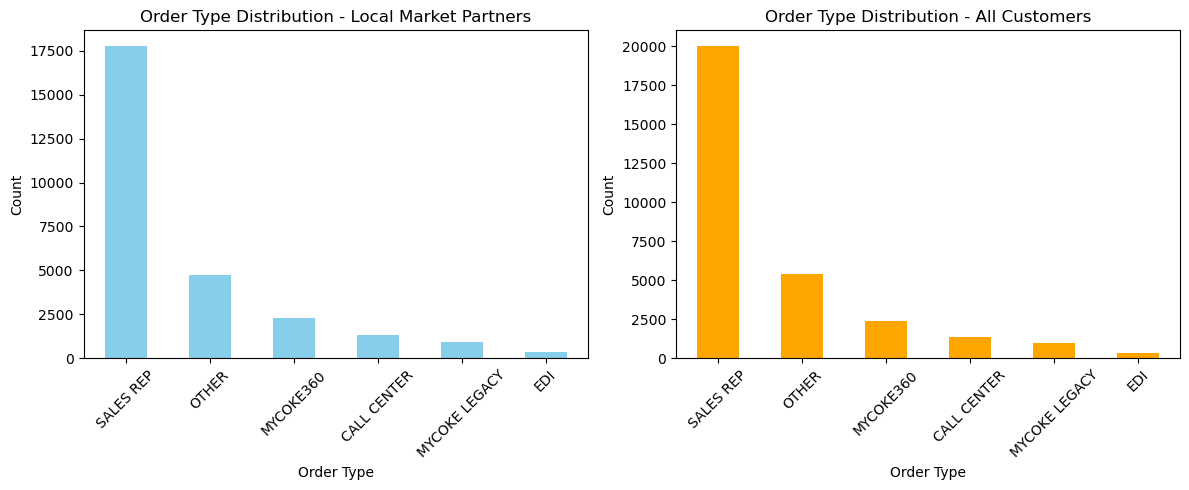

CO2 Purchasing Behavior (%):
 CO2_CUSTOMER              False      True 
LOCAL_MARKET_PARTNER                      
False                 55.587576  44.412424
True                  61.268507  38.731493


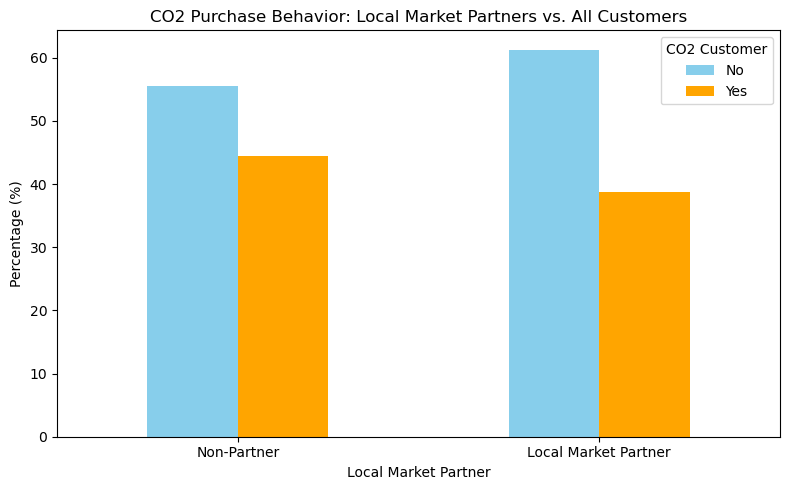

In [11]:
import matplotlib.pyplot as plt

# 1. Order Type Distribution Comparison
plt.figure(figsize=(12, 5))

# Local Market Partners Order Type
plt.subplot(1, 2, 1)
local_market_partners = customer_profile[customer_profile['LOCAL_MARKET_PARTNER'] == True]
local_market_partners['FREQUENT_ORDER_TYPE'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Order Type Distribution - Local Market Partners')
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# All Customers Order Type
plt.subplot(1, 2, 2)
customer_profile['FREQUENT_ORDER_TYPE'].value_counts().plot(kind='bar', color='orange')
plt.title('Order Type Distribution - All Customers')
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. CO2 Purchase Distribution Comparison
co2_comparison = customer_profile.groupby('LOCAL_MARKET_PARTNER')['CO2_CUSTOMER'].value_counts(normalize=True).unstack() * 100
print("CO2 Purchasing Behavior (%):\n", co2_comparison)

# Visualize CO2 purchase behavior
co2_comparison.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('CO2 Purchase Behavior: Local Market Partners vs. All Customers')
plt.xlabel('Local Market Partner')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Non-Partner', 'Local Market Partner'], rotation=0)
plt.legend(title='CO2 Customer', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

✅ Insights from the Customer Profile Comparison

1. Order Type Distribution:
   1. Both Local Market Partners and All Customers heavily rely on SALES REP orders.
   2. Local Market Partners have a slightly higher reliance on SALES REP orders compared to All Customers.
   3. Order types like MYCOKE360, CALL CENTER, and EDI show similar lower usage across both groups, but Local Market Partners use digital ordering platforms even less than All Customers.

3. CO2 Purchase Behavior:
   1. A smaller percentage of Local Market Partners purchase CO2 (38.7%) compared to All Customers (44.4%).
   2. This aligns with the expectation that Local Market Partners tend to focus more on fountain-only purchases.

🎯 Business Implications
1. Ordering Behavior Suggests Strong Sales Rep Reliance:
   1. For both groups, the heavy reliance on SALES REP indicates that direct engagement is critical for maintaining high customer relationships and potential sales growth.
2. CO2 Purchases Are Less Common Among Local Market Partners:
   1. Given the lower CO2 purchase rates, SCCU could prioritize Local Market Partners with no CO2 purchases when considering ARTM shifts.
   2. However, those Local Market Partners who purchase CO2 might be exceptions and should be evaluated more carefully for growth potential.

3. Digital Order Channels Are Underutilized:
   1. There might be an opportunity to encourage more digital ordering (e.g., MYCOKE360) among Local Market Partners to reduce operational costs while maintaining service levels.

### Investigate High-Potential Customers by Order Type

🎯 Plan: Investigate High-Potential Customers by Order Type

1. Define High-Potential Customers:
   1. Select customers in the top 25% based on PRIMARY_GROUP_NUMBER as a proxy for high sales potential.

2. Analyze Order Types of High-Potential Customers
   1. See which order types dominate among high-potential customers.
   2. Compare with overall order type distribution for all customers.

3. Visualize the Results
   1. Bar chart comparing order type frequency for high-potential vs. all customers.


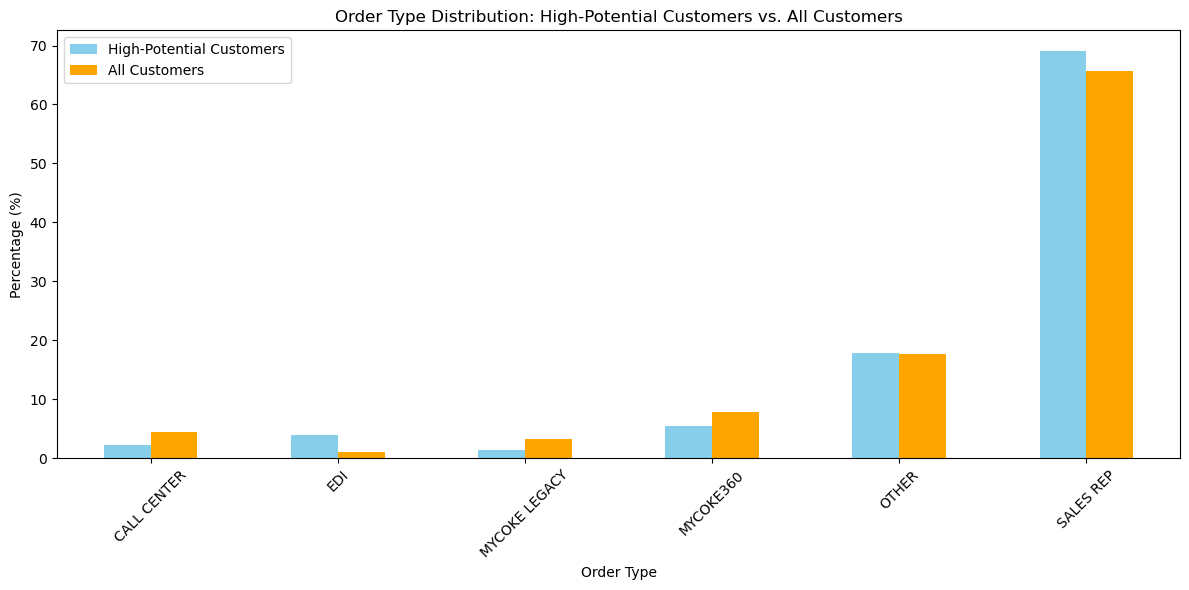

In [13]:
# 1. Define high-potential customers using the top 25% threshold
threshold = customer_profile['PRIMARY_GROUP_NUMBER'].quantile(0.75)
high_potential_customers = customer_profile[customer_profile['PRIMARY_GROUP_NUMBER'] >= threshold]

# 2. Analyze order type distribution for high-potential customers
high_potential_order_distribution = high_potential_customers['FREQUENT_ORDER_TYPE'].value_counts(normalize=True) * 100
overall_order_distribution = customer_profile['FREQUENT_ORDER_TYPE'].value_counts(normalize=True) * 100

# 3. Visualize the comparison
import matplotlib.pyplot as plt

# Create a DataFrame to compare distributions
order_comparison = pd.DataFrame({
    'High-Potential Customers': high_potential_order_distribution,
    'All Customers': overall_order_distribution
}).fillna(0)

# Plot the comparison
order_comparison.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Order Type Distribution: High-Potential Customers vs. All Customers')
plt.xlabel('Order Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🎯 Business Implications for Delivery Strategy

1. Retain High-Potential Customers on Red Truck Deliveries
    1. Customers who primarily use SALES REP or EDI ordering channels should be prioritized for direct delivery (Red Truck).
    2. These channels correlate with higher growth potential and sales volume.

2. Consider ARTM for Low-Touch Order Types
    1. Customers primarily using CALL CENTER or digital platforms like MYCOKE LEGACY could be evaluated for ARTM, as these channels show weaker associations with high potential.

3. Further Investigation of EDI Customers
   1. Since EDI shows a slight increase in high-potential customers, it may be worth exploring whether these customers are suitable for customized engagement strategies.


### Analyze CO2 Purchases

🎯 Goal of Analysis

1. Compare the proportion of CO2 customers (CO2_CUSTOMER = True) between high-potential customers and all customers.
  
2. Identify whether CO2 purchases are a strong indicator of higher sales potential.

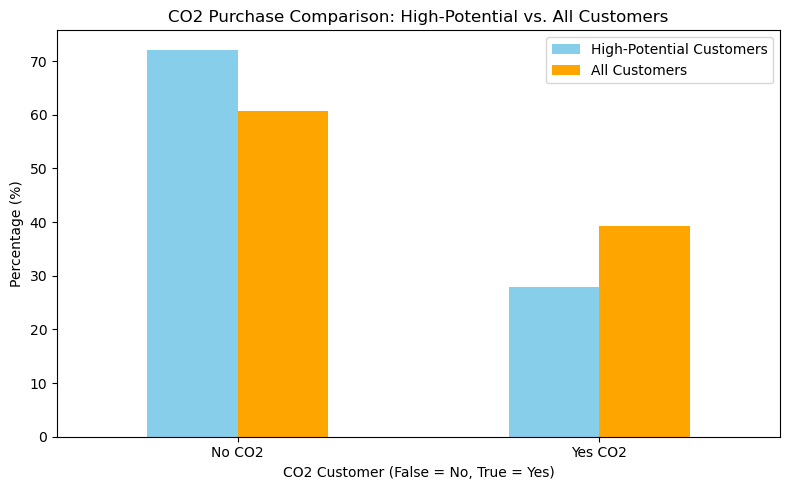

In [15]:
# Calculate CO2 customer proportions for high-potential vs. all customers
co2_high_potential = high_potential_customers['CO2_CUSTOMER'].value_counts(normalize=True) * 100
co2_all_customers = customer_profile['CO2_CUSTOMER'].value_counts(normalize=True) * 100

# Combine into a DataFrame for visualization
co2_comparison = pd.DataFrame({
    'High-Potential Customers': co2_high_potential,
    'All Customers': co2_all_customers
}).fillna(0)

# Plot the comparison
co2_comparison.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('CO2 Purchase Comparison: High-Potential vs. All Customers')
plt.xlabel('CO2 Customer (False = No, True = Yes)')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['No CO2', 'Yes CO2'], rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

🎯 Business Implications

1. CO2 Purchases Are Not a Strong Indicator of Sales Potential
   1. Customers buying CO2 may not necessarily be high-growth accounts.
   2. SCCU should not prioritize CO2 purchasing behavior when deciding which customers to retain on red truck deliveries.

3. Focus on Order Type Over CO2 Purchases
   1. Prioritize analyzing ordering behavior (especially SALES REP and EDI usage) to identify high-potential customers.
   2. Customers who frequently use direct ordering methods seem to hold higher growth potential, regardless of whether they purchase CO2.


# 3. Transactional Data

### Basic Information

In [5]:
# Display basic information about the transactional data
print("Transactional Data Information:")
transactional_data.info()

# Preview the first few rows to understand the structure
print("\nFirst 5 rows of the transactional data:")
print(transactional_data.head())

Transactional Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045540 entries, 0 to 1045539
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TRANSACTION_DATE   1045540 non-null  object 
 1   WEEK               1045540 non-null  int64  
 2   YEAR               1045540 non-null  int64  
 3   CUSTOMER_NUMBER    1045540 non-null  int64  
 4   ORDER_TYPE         1034409 non-null  object 
 5   ORDERED_CASES      1045540 non-null  float64
 6   LOADED_CASES       1045540 non-null  float64
 7   DELIVERED_CASES    1045540 non-null  float64
 8   ORDERED_GALLONS    1045540 non-null  float64
 9   LOADED_GALLONS     1045540 non-null  float64
 10  DELIVERED_GALLONS  1045540 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 87.7+ MB

First 5 rows of the transactional data:
  TRANSACTION_DATE  WEEK  YEAR  CUSTOMER_NUMBER     ORDER_TYPE  ORDERED_CASES  \
0         1/5/2023  

### Aggregate Total Purchases by Customer

In [33]:
# Aggregate total gallons and cases per customer
customer_transactions = transactional_data.groupby('CUSTOMER_NUMBER').agg({
    'ORDERED_GALLONS': 'sum',
    'ORDERED_CASES': 'sum'
}).reset_index()

# Rename columns for clarity
customer_transactions.rename(columns={
    'DELIVERED_GALLONS': 'Total_Delivered_Gallons',
    'DELIVERED_CASES': 'Total_Delivered_Cases'
}, inplace=True)

# Preview the aggregated data
print(customer_transactions.head())

   CUSTOMER_NUMBER  ORDERED_GALLONS  ORDERED_CASES
0        500245678            392.5          361.0
1        500245685           1022.5           61.0
2        500245686              0.0           36.0
3        500245687            272.5            0.0
4        500245689            880.0          287.5


# Merge Transactional Data with Customer Profile

### Check the Merge File 

In [31]:
# Merge aggregated transactions with customer profile
customer_merged = pd.merge(customer_transactions, customer_profile, on='CUSTOMER_NUMBER', how='left')

# Preview the merged dataset to confirm the merge
print(customer_merged.head())

# Check the number of customers in each group
group_counts = customer_merged['LOCAL_MARKET_PARTNER'].value_counts()
print("\nCustomer Group Counts:\n", group_counts)

   CUSTOMER_NUMBER  ORDERED_GALLONS  ORDERED_CASES  PRIMARY_GROUP_NUMBER  \
0        500245678            392.5          361.0                   NaN   
1        500245685           1022.5           61.0                   NaN   
2        500245686              0.0           36.0                8333.0   
3        500245687            272.5            0.0                   NaN   
4        500245689            880.0          287.5                   NaN   

  FREQUENT_ORDER_TYPE FIRST_DELIVERY_DATE ON_BOARDING_DATE COLD_DRINK_CHANNEL  \
0           SALES REP           3/19/2018        3/11/2015              EVENT   
1               OTHER            3/2/2018        8/18/2015             DINING   
2         CALL CENTER            3/7/2023         8/5/2015              GOODS   
3               OTHER           3/19/2018         8/6/2015              EVENT   
4               OTHER           2/28/2018        8/25/2015             DINING   

          TRADE_CHANNEL           SUB_TRADE_CHANNEL  LOC

In [55]:
import pandas as pd
import numpy as np

# Load your merged dataset
df = pd.read_csv("customer_merged_with_FINAL.csv")

# Define performance categories based on Total Delivered Gallons
conditions = [
    (df['ORDERED_GALLONS'] > 1000) & (df['ORDERED_CASES'] > 500),
    (df['ORDERED_GALLONS'] > 100) | (df['ORDERED_CASES'] > 100),
    (df['ORDERED_GALLONS'] <= 100) & (df['ORDERED_CASES'] <= 100)
]
choices = ['High', 'Medium', 'Low']

# Create the new column
df['performance_category'] = np.select(conditions, choices, default='Low')

# Save to a new file if needed
df.to_csv("customer_merged_with_FINAL.csv", index=False)

# Quick check
print(df['performance_category'].value_counts())
# Save to a new file if needed
df.to_csv("customer_merged_with_FINAL_1.csv", index=False)

performance_category
Medium    22518
Low        7161
High        643
Name: count, dtype: int64


In [47]:
print(df.head())

   CUSTOMER_NUMBER  ORDERED_GALLONS  ORDERED_CASES  PRIMARY_GROUP_NUMBER  \
0        500245678            392.5          361.0                   NaN   
1        500245685           1022.5           61.0                   NaN   
2        500245686              0.0           36.0                8333.0   
3        500245687            272.5            0.0                   NaN   
4        500245689            880.0          287.5                   NaN   

  FREQUENT_ORDER_TYPE FIRST_DELIVERY_DATE ON_BOARDING_DATE COLD_DRINK_CHANNEL  \
0           SALES REP           3/19/2018        3/11/2015              EVENT   
1               OTHER            3/2/2018        8/18/2015             DINING   
2         CALL CENTER            3/7/2023         8/5/2015              GOODS   
3               OTHER           3/19/2018         8/6/2015              EVENT   
4               OTHER           2/28/2018        8/25/2015             DINING   

          TRADE_CHANNEL           SUB_TRADE_CHANNEL  LOC